## Which numbers are the most frequently drawn in Mega Millions since 2002?


-  Source: https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002
-  Brief Description: This dataset contains the winning numbers (and related draw information) for  Mega Millions lottery drawings.
-  Time Period: 2002-Present
-  I chose this dataset because it provides a complete history of Mega Millions winning numbers since 2002, allowing me to analyze long-term patterns and determine which numbers are drawn most.


In [27]:
import pandas as pd 

df = pd.read_csv('s3://ia340-fall2025-nv/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv')

df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        2441 non-null   object 
 1   Winning Numbers  2441 non-null   object 
 2   Mega Ball        2441 non-null   int64  
 3   Multiplier       1483 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 76.4+ KB


In [3]:
df.describe()

,Mega Ball,Multiplier
count,2441.000000,1483.000000
mean,17.745596,3.289278
std,12.579860,0.990133
min,1.000000,2.000000
25%,8.000000,2.000000
50%,15.000000,3.000000
75%,25.000000,4.000000
max,52.000000,5.000000


In [5]:
df = df.dropna() 
df.isnull().sum()

Draw Date          0
Winning Numbers    0
Mega Ball          0
Multiplier         0
dtype: int64

There are no missing values in this dataset.

In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df_clean = df.drop_duplicates()

print(f"Shape before: {df.shape}")
print(f"Shape after: {df_clean.shape}")


Number of duplicate rows: 0
Shape before: (1483, 4)
Shape after: (1483, 4)


There are no duplicates in this dataset.

In [15]:
if 'Draw Date' in df.columns:
    df['Draw Date'] = pd.to_datetime(df['Draw Date'], errors='coerce')
    print("Converted 'Draw Date' to datetime:")
    print(df['Draw Date'].head())  # show first few parsed values
else:
    print("'Draw Date' column not found.")

Converted 'Draw Date' to datetime:
0   2020-09-25
1   2020-09-29
2   2020-10-02
3   2020-10-06
4   2020-10-09
Name: Draw Date, dtype: datetime64[ns]


In [16]:
numeric_cols = ['Mega Ball', 'Multiplier']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"\nConverted '{col}' to numeric. Example values:")
        print(df[col].head())
    else:
        print(f"'{col}' column not found.")


Converted 'Mega Ball' to numeric. Example values:
0    16
1    19
2    25
3    17
4    13
Name: Mega Ball, dtype: int64

Converted 'Multiplier' to numeric. Example values:
0    2.0
1    3.0
2    2.0
3    3.0
4    2.0
Name: Multiplier, dtype: float64


In [40]:
import pandas as pd
import re
from datetime import datetime


df = pd.read_csv("s3://ia340-fall2025-nv/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")

def valid_date(date_str):
    """Check if Draw Date is a valid date in MM/DD/YYYY format."""
    try:
        datetime.strptime(date_str, "%m/%d/%Y")
        return True
    except:
        return False

def valid_winning_numbers(numbers_str):
    """Check if Winning Numbers column contains exactly 5 unique integers within valid range."""
    if not isinstance(numbers_str, str):
        return False
    nums = re.findall(r"\d+", numbers_str)
    if len(nums) != 5:
        return False
    nums = list(map(int, nums))
    return all(1 <= n <= 75 for n in nums) and len(set(nums)) == 5

def valid_mega_ball(mb):
    """Mega Ball must be between 1 and 25 (after rule change)."""
    try:
        mb = int(mb)
        return 1 <= mb <= 25
    except:
        return False

def valid_multiplier(mult):
    """Multiplier must be one of {2,3,4,5} or blank."""
    if pd.isna(mult):
        return True
    try:
        return int(mult) in {2, 3, 4, 5}
    except:
        return False


df["Valid_Date"] = df["Draw Date"].apply(valid_date)
df["Valid_Winning_Numbers"] = df["Winning Numbers"].apply(valid_winning_numbers)
df["Valid_Mega_Ball"] = df["Mega Ball"].apply(valid_mega_ball)
df["Valid_Multiplier"] = df["Multiplier"].apply(valid_multiplier)

invalid_rows = df[
    (~df["Valid_Date"]) |
    (~df["Valid_Winning_Numbers"]) |
    (~df["Valid_Mega_Ball"]) |
    (~df["Valid_Multiplier"])
]

print("----------------------------")
print(f"Total rows: {len(df)}")
print(f"Invalid rows found: {len(invalid_rows)}\n")

print("Invalid Rows Preview:")
print(invalid_rows.head(10))

----------------------------
Total rows: 2441
Invalid rows found: 563

Invalid Rows Preview:
      Draw Date Winning Numbers  Mega Ball  Multiplier  Valid_Date  \
785  10/11/2013  03 27 37 45 48         46         4.0        True   
789  09/27/2013  09 23 27 49 51         38         2.0        True   
790  09/24/2013  04 11 32 39 40         33         3.0        True   
791  09/20/2013  01 15 20 21 47         34         2.0        True   
795  09/06/2013  02 16 17 22 41         31         4.0        True   
796  09/03/2013  04 13 14 28 41         28         3.0        True   
797  08/30/2013  06 19 24 43 44         33         2.0        True   
798  08/27/2013  04 07 30 36 38         38         4.0        True   
800  08/20/2013  13 28 35 38 41         33         3.0        True   
801  08/16/2013  07 13 26 36 46         37         4.0        True   

     Valid_Winning_Numbers  Valid_Mega_Ball  Valid_Multiplier  
785                   True            False              True  
789     

This validity check looked at ranges, catergories, and data consistency. It identified any rows with invalid dates, out-of-range winning numbers, incorrect Mega Ball values, or invalid multiplers, helping verify the dataset's accuracy. 


In [23]:
import pandas as pd

df = pd.read_csv("s3://ia340-fall2025-nv/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")

numbers = df["Winning Numbers"].str.split(" ", expand=True)
numbers = numbers.apply(pd.to_numeric, errors="coerce")

all_nums = numbers.values.flatten()
all_nums = pd.Series(all_nums).dropna().astype(int)

freq_table = all_nums.value_counts().reset_index()
freq_table.columns = ["Number", "Frequency"]

freq_table = freq_table.sort_values(by="Frequency", ascending=False)

print(freq_table.head(10))  



   Number  Frequency
0      31        234
1      10        232
3      14        225
2      17        225
4      20        224
5      46        217
8       2        212
6      24        212
7      29        212
9      39        210


This summary table was generated to determine which Mega Million numbers have appeared most often. This supports my research question because it directly shows which numbers have been the most frequently drawn during the Mega Million lottery since 2002. The new variable that was created in this summary table is "Frequency."

In [26]:
import pandas as pd

df = pd.read_csv("s3://ia340-fall2025-nv/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")

df["Draw Date"] = pd.to_datetime(df["Draw Date"], format="%m/%d/%Y", errors="coerce")

df_2020 = df[df["Draw Date"].dt.year == 2020]

print(df_2020.head(10)) 

   Draw Date Winning Numbers  Mega Ball  Multiplier
0 2020-09-25  20 36 37 48 67         16         2.0
1 2020-09-29  14 39 43 44 67         19         3.0
2 2020-10-02  09 38 47 49 68         25         2.0
3 2020-10-06  15 16 18 39 59         17         3.0
4 2020-10-09  05 11 25 27 64         13         2.0
5 2020-10-13  11 44 45 46 70         25         2.0
6 2020-10-16  27 32 50 52 57         12         5.0
7 2020-10-20  46 54 57 58 66         10         3.0
8 2020-10-23  18 34 44 60 69         22         2.0
9 2020-10-27  06 13 34 46 62          1         3.0


This DataFrame filters the data to only show Mega Millions drawn from 2020.

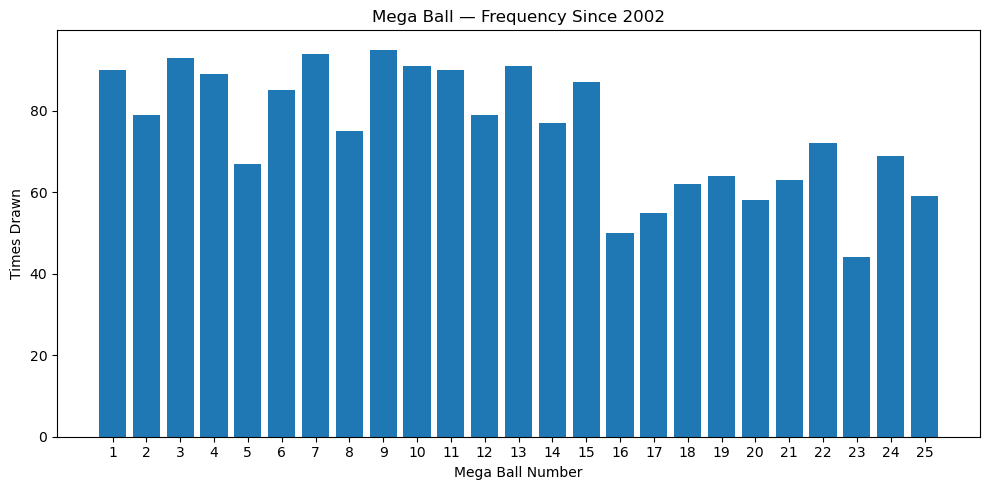

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("s3://ia340-fall2025-nv/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")

nums = df["Winning Numbers"].str.split(" ", expand=True).apply(pd.to_numeric, errors="coerce")
nums.columns = [f"Num{i+1}" for i in range(1, 6)]

main_series = pd.concat([nums[c] for c in nums.columns]).dropna().astype(int)

main_range = range(1, 76)
main_freq = main_series.value_counts().sort_index().reindex(main_range, fill_value=0)

mega_series = pd.to_numeric(df["Mega Ball"], errors="coerce").dropna().astype(int)
mega_range = range(1, 26)
mega_freq = mega_series.value_counts().sort_index().reindex(mega_range, fill_value=0)


plt.figure(figsize=(10, 5))
plt.bar(mega_freq.index, mega_freq.values)
plt.title("Mega Ball — Frequency Since 2002")
plt.xlabel("Mega Ball Number")
plt.ylabel("Times Drawn")
plt.xticks(list(range(1, 26)))
plt.tight_layout()
plt.savefig("megaball_frequency.png", dpi=150)
plt.show()


This bar graph shows the frequency of each Mega Ball number (1-25) drawn since 2002. This visually identfies which Mega Ball numbers have been drawn the most often, revealing patters in frequency acrosss all of the Mega Million winning numbers. 

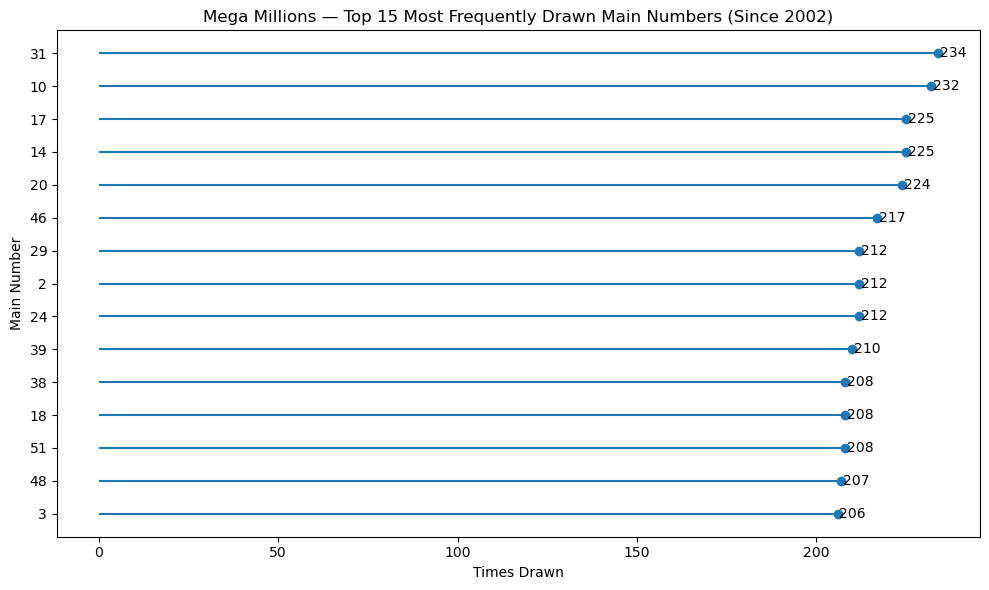

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("s3://ia340-fall2025-nv/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")

nums = df["Winning Numbers"].str.split(" ", expand=True).apply(pd.to_numeric, errors="coerce")
nums.columns = [f"Num{i+1}" for i in range(1, 6)]

main_all = pd.concat([nums[c] for c in nums.columns]).dropna().astype(int)
freq = main_all.value_counts().sort_values(ascending=False)

top_n = 15
top_freq = freq.head(top_n).sort_values(ascending=True)  # ascending for horizontal plot

plt.figure(figsize=(10, 6))
ypos = range(len(top_freq))
plt.hlines(y=ypos, xmin=0, xmax=top_freq.values)                 # stems
plt.plot(top_freq.values, ypos, "o")                              # markers

plt.yticks(ticks=ypos, labels=top_freq.index.astype(int))
plt.xlabel("Times Drawn")
plt.ylabel("Main Number")
plt.title(f"Mega Millions — Top {top_n} Most Frequently Drawn Main Numbers (Since 2002)")

for i, v in enumerate(top_freq.values):
    plt.text(v + 0.5, i, str(v), va="center")

plt.tight_layout()
plt.savefig("top15_main_numbers_lollipop.png", dpi=150)
plt.show()

This lollipop chart visualizes the top 15 most frequently drawn numbers in Mega Millions history since 2002. The longer the line, the more frequently that number had appeared on winning tickets. This directly supports my research question by clearly showing which specific numbers have appeared most often over time. 